# Load various df

Load item_code and premise_code data. Item_code and premise_code are fixed for all months

In [1]:
import numpy as np
import pandas as pd

URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_premise.parquet'
df_premise_code = pd.read_parquet(URL_DATA)
if 'date' in df_premise_code.columns: df_premise_code['date'] = pd.to_datetime(df_premise_code['date'])


URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_item.parquet'
df_item_code = pd.read_parquet(URL_DATA)
if 'date' in df_item_code.columns: df_item_code['date'] = pd.to_datetime(df_item_code['date'])



Use ['item_code'].unique()

In [2]:
print(len(df_item_code))
print(df_item_code['item'].nunique())

df_item_code[df_item_code["item"].duplicated(keep=False)]

757
710


,item_code,item,unit,item_group,item_category
76,190,SARDIN CAP AYAM (SOS TOMATO),155 g,BARANGAN BERBUNGKUS,IKAN DALAM TIN
77,191,SARDIN CAP AYAM (SOS TOMATO),425 g,BARANGAN BERBUNGKUS,IKAN DALAM TIN
78,192,SARDIN CAP KING CUP (SOS TOMATO),155 g,BARANGAN BERBUNGKUS,IKAN DALAM TIN
79,193,SARDIN CAP KING CUP (SOS TOMATO),425 g,BARANGAN BERBUNGKUS,IKAN DALAM TIN
80,195,MACKAREL CAP AYAM (SOS TOMATO),425 g,BARANGAN BERBUNGKUS,IKAN DALAM TIN
...,...,...,...,...,...
748,2012,KICAP TAMIN (DARK SOY SAUCE),350ml,BARANGAN BERBUNGKUS,KICAP DAN SOS
752,2016,SABUN SERBUK FAB (PERFECT),680g,PRODUK KEBERSIHAN,PENJAGAAN RUMAH
753,2017,DYNAMO POWER GEL (PERFECT CLEAN),2.6kg,PRODUK KEBERSIHAN,PENJAGAAN RUMAH
754,2018,SABUN PENCUCI SUNLIGHT (LEMON),900ml,PRODUK KEBERSIHAN,PENJAGAAN RUMAH


Load price data

In [3]:
def merge_data(df):

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning

    print(tempdf.head())
    #
    p =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["premise_type"])
    p.name = 'premise_type'


    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    q =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["premise"])
    q.name = 'premise'

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    s =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["state"])
    s.name = 'state'

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    t = tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')['district'])
    t.name = "district"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    u = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item'])
    u.name = "item"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    v = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['unit'])
    v.name = "unit"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    w = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item_category'])
    w.name = "item_category"

    
    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    w2 = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item_group'])
    w2.name = "item_group"

    #print('S:\n',s) 
    #print('T:\n',t)

    df_merged = pd.concat([df,p,q,s,t,u,v,w,w2],axis=1)
    return df_merged    

In [130]:
import numpy as np
import pandas as pd
from datetime import datetime


#Get all months from Jan 23 until today
datelist = pd.date_range(start ='01/01/2023' , end = '10/30/2023',freq="M").tolist() #be careful. dates are mm/dd/yyyy
datelist = [x.strftime('%Y-%m') for x in datelist]
print(datelist)

def get_all_dataframes(datelist):
    
    df_list=[]

    for month_d in datelist:

        month_parq = month_d +'.parquet'
        URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/pricecatcher_{}'.format(month_parq)
        
        df = pd.read_parquet(URL_DATA)
        if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])
        #df.head()
        df_list.append(df)
    
    return df_list

#This stores all price dataframes since Jan 22
df_all_list = get_all_dataframes(datelist)
print(f'Number of dataframes in the list: {len(df_all_list)}')


['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09']
Number of dataframes in the list: 9


In [131]:
for i, df in enumerate(df_all_list):
    df_all_list[i] = merge_data(df_all_list[i])


        date  premise_code  item_code  price
0 2023-01-01             2          1    9.4
1 2023-01-01             2          9   36.0
2 2023-01-01             2         14   24.0
3 2023-01-01             2         16    4.5
4 2023-01-01             2         18    5.5
        date  premise_code  item_code  price
0 2023-02-01             2          1    9.4
1 2023-02-01             2          9   36.0
2 2023-02-01             2         14   24.0
3 2023-02-01             2         16    4.5
4 2023-02-01             2         18    5.5
        date  premise_code  item_code  price
0 2023-03-01             2          1    9.4
1 2023-03-01             2          9   36.0
2 2023-03-01             2         14   24.0
3 2023-03-01             2         16    4.5
4 2023-03-01             2         18    5.5
        date  premise_code  item_code  price
0 2023-04-01             2          1    9.4
1 2023-04-01             2          9   36.0
2 2023-04-01             2         14   24.0
3 2023-04-

Merge price and premise info

In [132]:
df_master = pd.DataFrame(columns=['date','premise_code','item_code','price','premise_type','premise','state','district','item','unit','item_category'])
#df_master.head()
for df in df_all_list:
    df_master = pd.concat([df_master,df])

df_master.head()    

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,item_group
0,2023-01-01,2,1,9.4,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,AYAM,BARANGAN SEGAR
1,2023-01-01,2,9,36.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,DAGING,BARANGAN SEGAR
2,2023-01-01,2,14,24.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,DAGING KERBAU IMPORT (INDIA) * (TOP SIDE),1kg,DAGING,BARANGAN SEGAR
3,2023-01-01,2,16,4.5,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,BETIK BIASA,1kg,BUAH-BUAHAN,BARANGAN SEGAR
4,2023-01-01,2,18,5.5,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,PISANG BERANGAN,1kg,BUAH-BUAHAN,BARANGAN SEGAR


In [133]:
df_master.tail()

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,item_group
1133809,2023-09-14,20895,1939,30.90,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,MINYAK MASAK TULEN CAP SAJI,5 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS
1133810,2023-09-14,20895,1941,13.30,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,MINYAK MASAK TULEN CAP ALIF,2 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS
1133811,2023-09-14,20895,1942,30.90,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,MINYAK MASAK TULEN CAP ALIF,5 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS
1133812,2023-09-14,20895,1945,0.79,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,TAUHU (JENIS KERAS),sekeping,TAUHU DAN TEMPE,BARANGAN SEGAR
1133813,2023-09-14,20895,1946,1.59,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,TEMPE (BUNGKUSAN PLASTIK),sekeping,TAUHU DAN TEMPE,BARANGAN SEGAR


Add Monthdate

In [134]:
df_master['monthdate'] = df_master["date"].apply(lambda x: x.strftime('%Y-%m'))

# Master Dataframe

In [135]:
df_master.sample(5)

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,item_group,monthdate
1583302,2023-08-20,20769,1598,13.90,Pasar Raya / Supermarket,ECONSAVE CASH & CARRY JERAM BATU,Johor,Pontian,MINYAK MASAK SEBATIAN CAP HELANG,2 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS,2023-08
1384003,2023-08-18,758,260,33.99,Pasar Raya / Supermarket,EVERRISE DEPARTMENTAL STORE SDN. BHD. (4TH MILE),Sarawak,Kuching,MINYAK MASAK SEBATIAN CAP PISAU,5 kg,MINYAK DAN LEMAK,BARANGAN BERBUNGKUS,2023-08
235182,2023-07-03,16797,896,1.99,Hypermarket,GIANT KULIM,Kedah,Kulim,HALBA,100 g,REMPAH RATUS (TIDAK BERBUNGKUS),BARANGAN BERBUNGKUS,2023-07
2107067,2023-05-31,11623,114,2.20,Pasar Raya / Supermarket,TMC ( BANGSAR ),W.P. Kuala Lumpur,Lembah Pantai,TOMATO,1kg,SAYUR-SAYURAN,BARANGAN SEGAR,2023-05
1088120,2023-07-13,17428,108,10.00,Pasar Basah,"MYFARM OUTLET, RTC TUNJONG",Kelantan,Kota Bharu,KUNYIT HIDUP,1kg,SAYUR-SAYURAN,BARANGAN SEGAR,2023-07


In [136]:
df_master['item_group'].unique()

array(['BARANGAN SEGAR', 'BARANGAN KERING', 'BARANGAN BERBUNGKUS',
       'MINUMAN', 'PRODUK KEBERSIHAN', 'SUSU DAN BARANGAN BAYI'],
      dtype=object)

# Df barangan segar

In [137]:
df_barangan_segar = df_master[df_master['item_group']=='BARANGAN SEGAR']

In [138]:
df_barangan_segar.tail()

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,item_group,monthdate
1133805,2023-09-14,20895,1926,12.29,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,CILI AKAR HIJAU,1kg,SAYUR-SAYURAN,BARANGAN SEGAR,2023-09
1133806,2023-09-14,20895,1927,18.39,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,CILI AKAR MERAH,1kg,SAYUR-SAYURAN,BARANGAN SEGAR,2023-09
1133807,2023-09-14,20895,1928,7.89,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,LIMAU KASTURI,1kg,SAYUR-SAYURAN,BARANGAN SEGAR,2023-09
1133812,2023-09-14,20895,1945,0.79,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,TAUHU (JENIS KERAS),sekeping,TAUHU DAN TEMPE,BARANGAN SEGAR,2023-09
1133813,2023-09-14,20895,1946,1.59,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,TEMPE (BUNGKUSAN PLASTIK),sekeping,TAUHU DAN TEMPE,BARANGAN SEGAR,2023-09


In [139]:
a = df_barangan_segar.tail(1)["monthdate"]
print(a.values[0])

b = df_barangan_segar.tail(1)["monthdate"].values[0]
print(b)

2023-09
2023-09


In [140]:
df_barangan_segar.item_category.unique()
print(len(df_barangan_segar))

11054123


In [141]:
df_barangan_segar.item_code.nunique()

160

In [142]:
df_barangan_segar.monthdate.unique()

array(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09'], dtype=object)

# Price Change Master_df

In [143]:
#Select item i.e ayam
#Select monthdate i.e aug 23
#compute max,min, mean

#df_one_item = df_master[df_master["item_code"]==131]

df_price_change_ALLitems = []

#Extract item_code and monthdate data
item_c_list  = df_barangan_segar["item_code"].unique() #take the list of items from the latest price dataframe



mthdate_list = df_barangan_segar["monthdate"].unique() #take the list of monthdates from df_master as this a combined df since jan22

i=1
for item_c in item_c_list:

    #Select ONE item
    x_df = df_barangan_segar[df_barangan_segar["item_code"]==item_c]
    x_index = x_df.index


    #Get ONE item details
    item = x_df["item"].unique()
    item = item[0]
    unit = x_df["unit"].unique()
    unit = unit[0]

    #print(f'{i}. item:{item} unit:{unit}')
    
    
    for mthdate in mthdate_list:
        
        #Select ONE monthdate
        y_df = x_df[x_df["monthdate"]==mthdate]
        
        if y_df.empty:
            #print('ONE ITEM DF IS EMPTY~~')
            print(f'ONE ITEM DF IS EMPTY!!~~ {i}. item_c:{item_c} item:{item} unit:{unit} mthdate:{mthdate}')

        else:

            #print(f'{i}. item:{item} unit:{unit} mthdate:{mthdate}')
            print(i)

            max_y = y_df["price"].max()
            min_y = y_df["price"].min()
            mean_y = y_df["price"].mean()

            df_price_change_ALLitems.append([item_c,item,unit,mthdate,max_y,min_y,mean_y])
    i+=1

    
    
print(len(x_df))
x_df.head()

df_price_change_ALLitems = pd.DataFrame(df_price_change_ALLitems,columns=['item_code','item','unit','monthdate','max','min','mean'])
df_price_change_ALLitems.head()


1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
35
35
35
36
36
36
36
36
36
36
36
36
37
37
37
37
37
37
37
37
37
38
38
38
38
38
38
38
38
38
39
39
39
39
39
39
39
39
39
40
40
40
40
40
40
40
40
40
4

,item_code,item,unit,monthdate,max,min,mean
0,1,AYAM BERSIH - STANDARD,1kg,2023-01,13.0,5.91,9.127694
1,1,AYAM BERSIH - STANDARD,1kg,2023-02,13.0,6.99,9.243196
2,1,AYAM BERSIH - STANDARD,1kg,2023-03,13.0,6.19,9.356440
3,1,AYAM BERSIH - STANDARD,1kg,2023-04,11.4,6.99,9.341487
4,1,AYAM BERSIH - STANDARD,1kg,2023-05,11.4,7.00,9.366750


In [144]:
df_price_change_ALLitems['item_code'].nunique()

160

In [145]:
#df_price_change_ALLitems.to_csv('df_price_change_ALLitems.csv')

In [146]:
len(df_price_change_ALLitems)

1425

In [147]:
df_price_change_ALLitems['item_code'].unique()

array([   1,    9,   14,   16,   18,   19,   21,   22,   24,   25,   27,
         31,   38,   39,   43,   47,   51,   55,   60,   70,   71,   79,
         83,   88,   89,   92,   93,   94,   95,   96,   97,   98,  101,
        103,  104,  105,  108,  109,  112,  113,  114,  124,  125,  716,
        845,  847,  849, 1128, 1130, 1132, 1367, 1379, 1380, 1381, 1400,
       1431, 1432, 1436, 1437, 1476, 1479, 1481, 1482, 1483, 1484, 1485,
       1487, 1553, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1804, 1818,
       1819, 1820, 1915, 1920, 1921, 1922, 1923, 1926, 1927, 1928, 1929,
       1930, 1945, 1946,    2,   69,  850, 1129, 1412, 1438, 1458, 1477,
       1550, 1551, 1552, 1554, 1918, 1821, 1110,   20,   73, 1383, 1914,
       1378,   82,  102, 1374, 1391, 1399, 1916, 1919, 1925,   65,   66,
       1111, 1913, 1369, 1375, 1376,   49,   78, 1377,  118,   52,   68,
         64, 1917, 1109,   11,  120,   87, 1911,  119, 1907, 1486, 1373,
       1908, 1912, 1475,   10,   12, 1368, 1396, 13

<Axes: title={'center': 'AYAM BERSIH - STANDARD 1kg'}, xlabel='monthdate', ylabel='mean'>

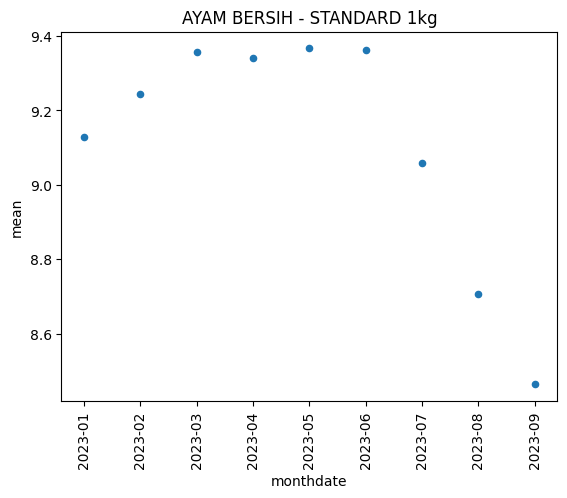

In [148]:
#cili kering 1899,1900
#bawang putih 1564
#ayam 1 kg 1
#bawang merah 131,132,1441,1442,1933

i = 1

#df_plot = df_price_change_ALLitems[df_price_change_ALLitems["item_code"]==item_c_list[i]]
df_plot = df_price_change_ALLitems[df_price_change_ALLitems["item_code"]==i]

item_name = df_plot["item"].unique()
item_name = item_name[0]

item_unit = df_plot["unit"].unique()
item_unit = item_unit[0]

title_plot = item_name + ' ' + item_unit

#df_plot.plot.scatter(x="monthdate",y="mean", title=title_plot, rot=90)
df_plot.plot.scatter(x="monthdate",y="mean", title=title_plot, rot=90)




160
0 1
1 9
2 14
3 16
4 18
5 19
6 21
7 22
8 24
9 25
10 27
11 31
12 38
13 39
14 43
15 47
16 51
17 55
18 60
19 70
20 71
21 79
22 83
23 88
24 89
25 92
26 93
27 94
28 95
29 96
30 97
31 98
32 101
33 103
34 104
35 105
36 108
37 109
38 112
39 113
40 114
41 124
42 125
43 716
44 845
45 847
46 849
47 1128
48 1130
49 1132
50 1367
51 1379
52 1380
53 1381
54 1400
55 1431
56 1432
57 1436
58 1437
59 1476
60 1479
61 1481
62 1482
63 1483
64 1484
65 1485
66 1487
67 1553
68 1555
69 1556
70 1557
71 1558
72 1559
73 1560
74 1561
75 1804
76 1818
77 1819
78 1820
79 1915
80 1920
81 1921
82 1922
83 1923
84 1926
85 1927
86 1928
87 1929
88 1930
89 1945
90 1946
91 2
92 69
93 850
94 1129
95 1412
96 1438
97 1458
98 1477
99 1550
100 1551
101 1552
102 1554
103 1918
104 1821
105 1110
106 20
107 73
108 1383
109 1914
110 1378
111 82
112 102
113 1374
114 1391
115 1399
116 1916
117 1919
118 1925
119 65
120 66
121 1111
122 1913
123 1369
124 1375
125 1376
126 49
127 78
128 1377
129 118
130 52
131 68
132 64
133 1917
134 1109


c:\Users\shahr\code\.mlenv\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\shahr\code\.mlenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


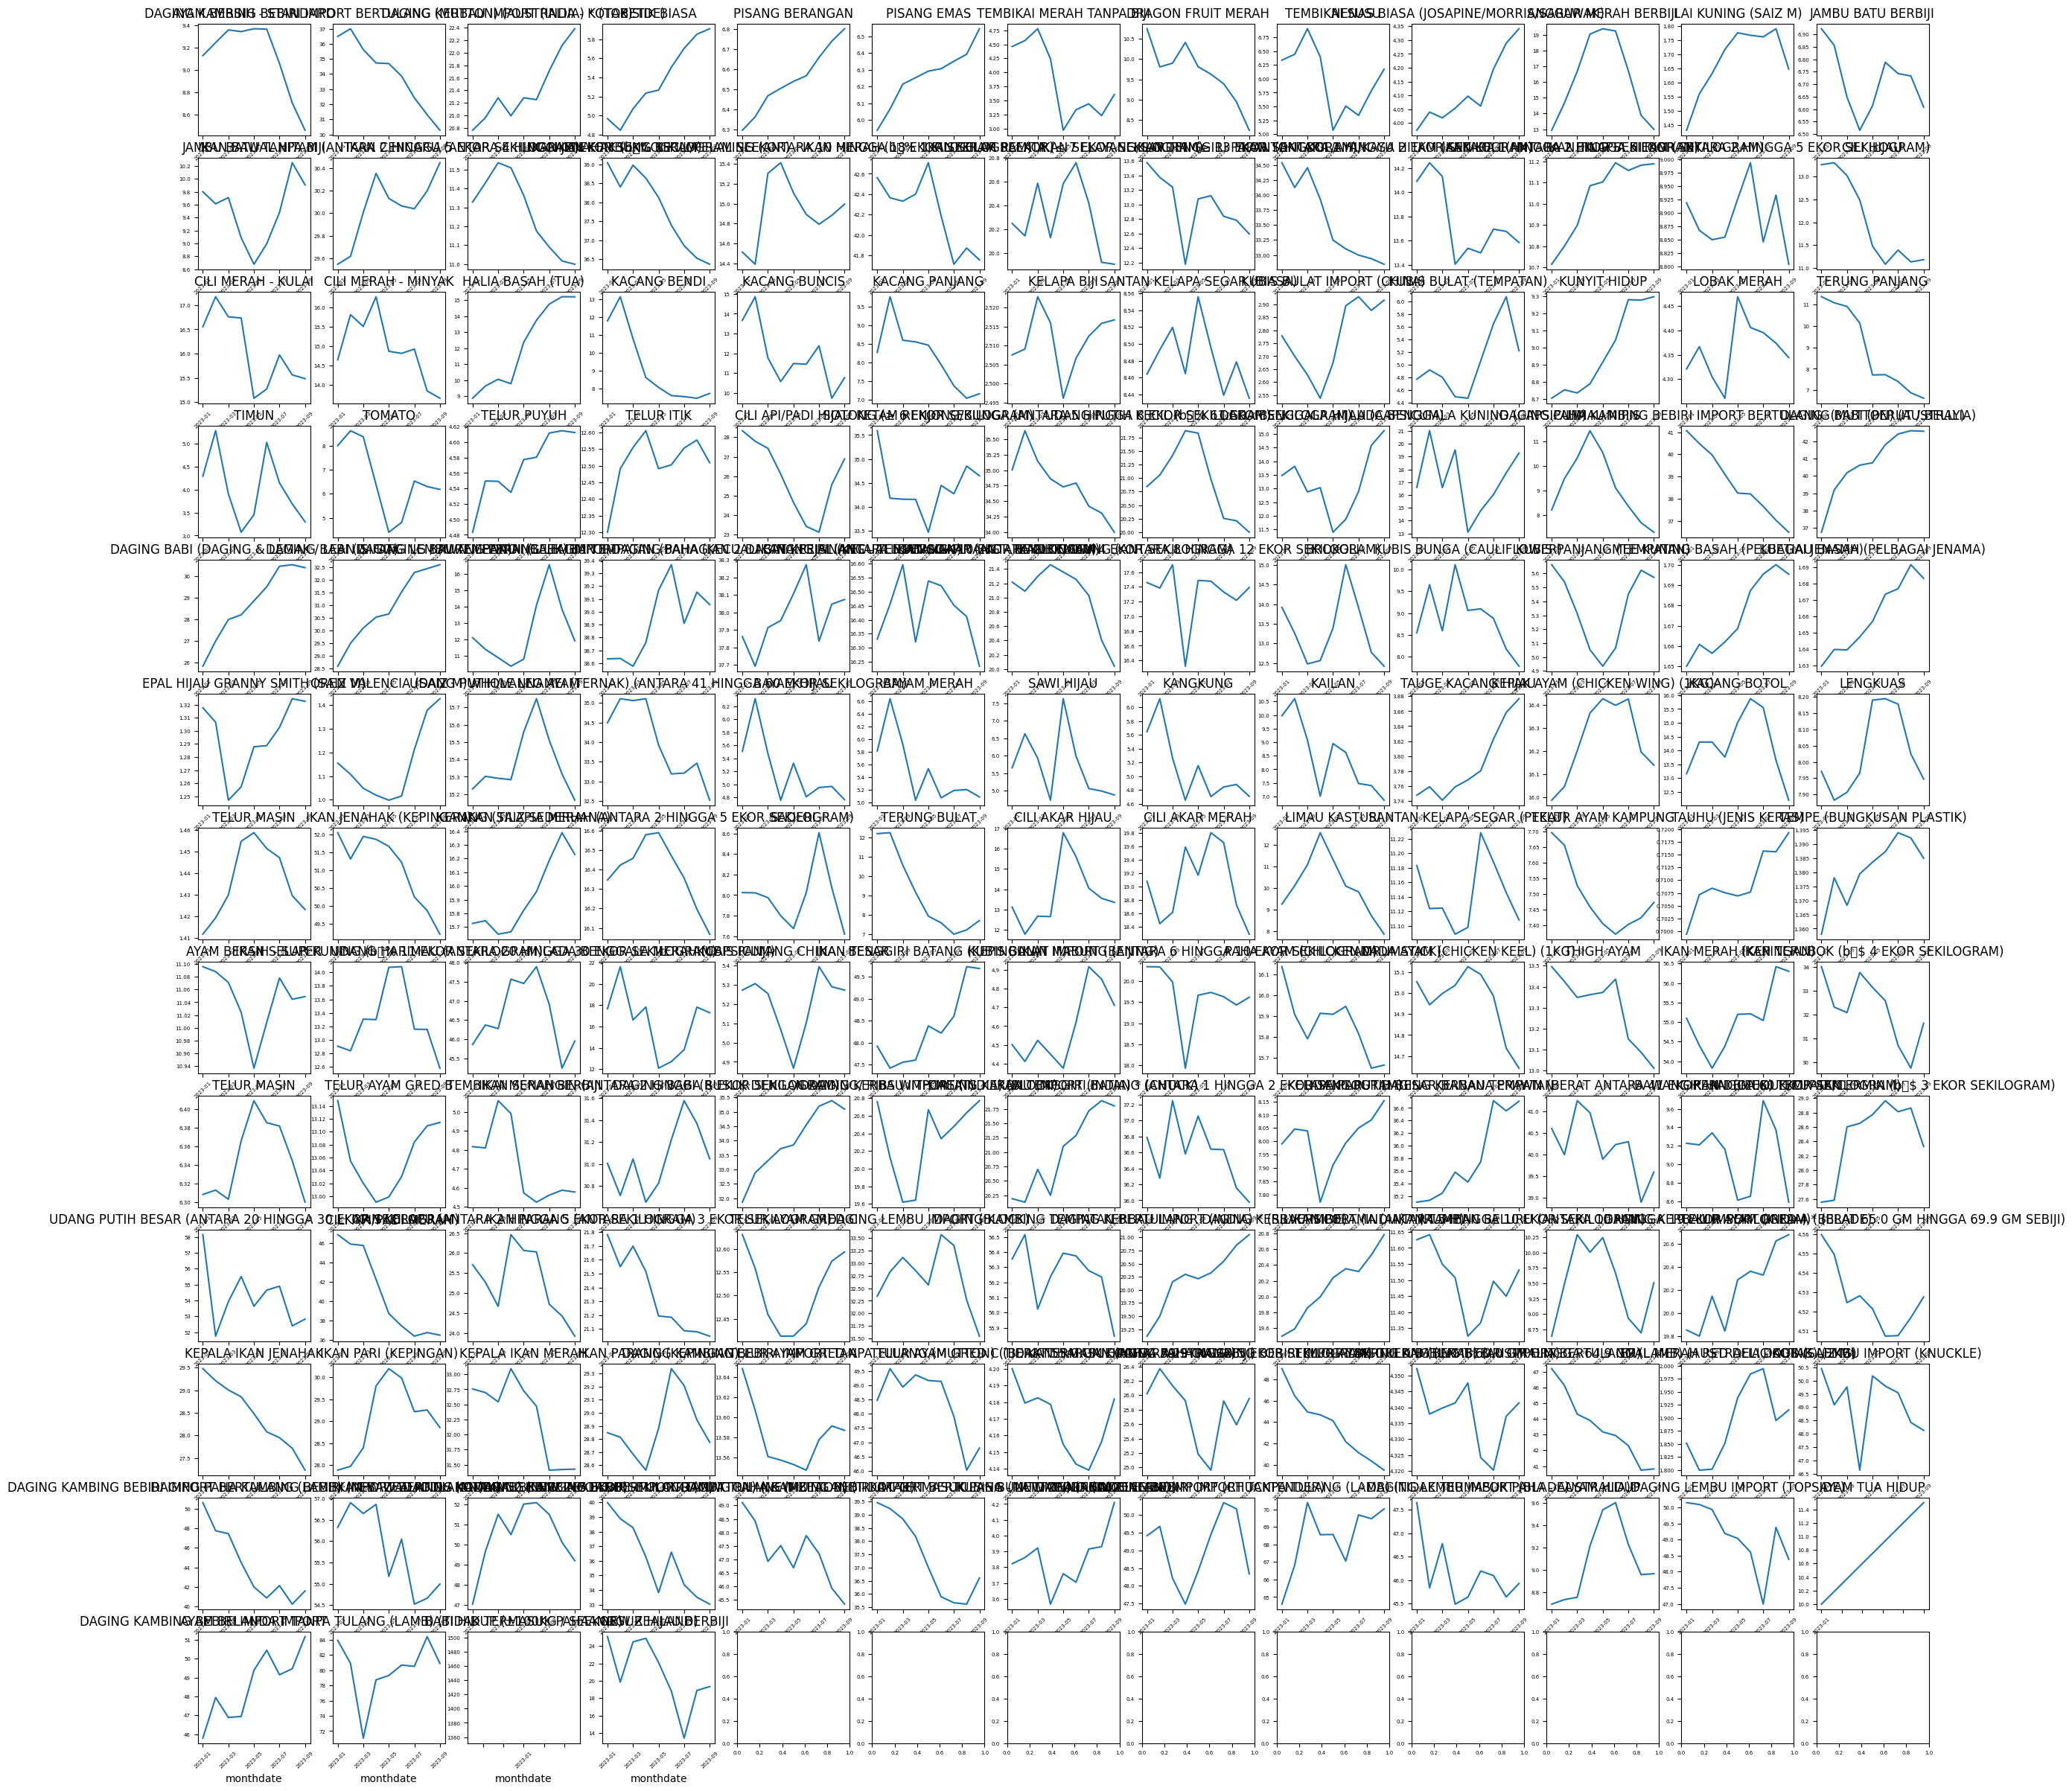

In [165]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=5) 
matplotlib.rc('ytick', labelsize=5) 
fig, axes = plt.subplots(nrows=13, ncols=13)

i=0
j=0

item_count=1
print(len(item_c_list))
for w,item_c in enumerate(item_c_list):

    #print(f'{w} {item_c}')

    #print(f'item_count:{item_count} i:{i} j:{j}')

    df_plot = df_price_change_ALLitems[df_price_change_ALLitems["item_code"]==item_c]

    item_name = df_plot["item"].unique()
    item_name = item_name[0]

    item_unit = df_plot["unit"].unique()
    item_unit = item_unit[0]

    #title_plot = item_name + ' ' + item_unit
    title_plot = item_name
    

    #df_plot.plot.scatter(x="monthdate",y="mean", title=title_plot, rot=90, ax=axes[i,j])
    df_plot.plot.line(x="monthdate",y="mean", title=title_plot, ax=axes[i,j], rot=45,figsize=(30,30),legend=False)

    j+=1

    if (j==13):
        j=0
        i+=1
   

160


c:\Users\shahr\code\.mlenv\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\shahr\code\.mlenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


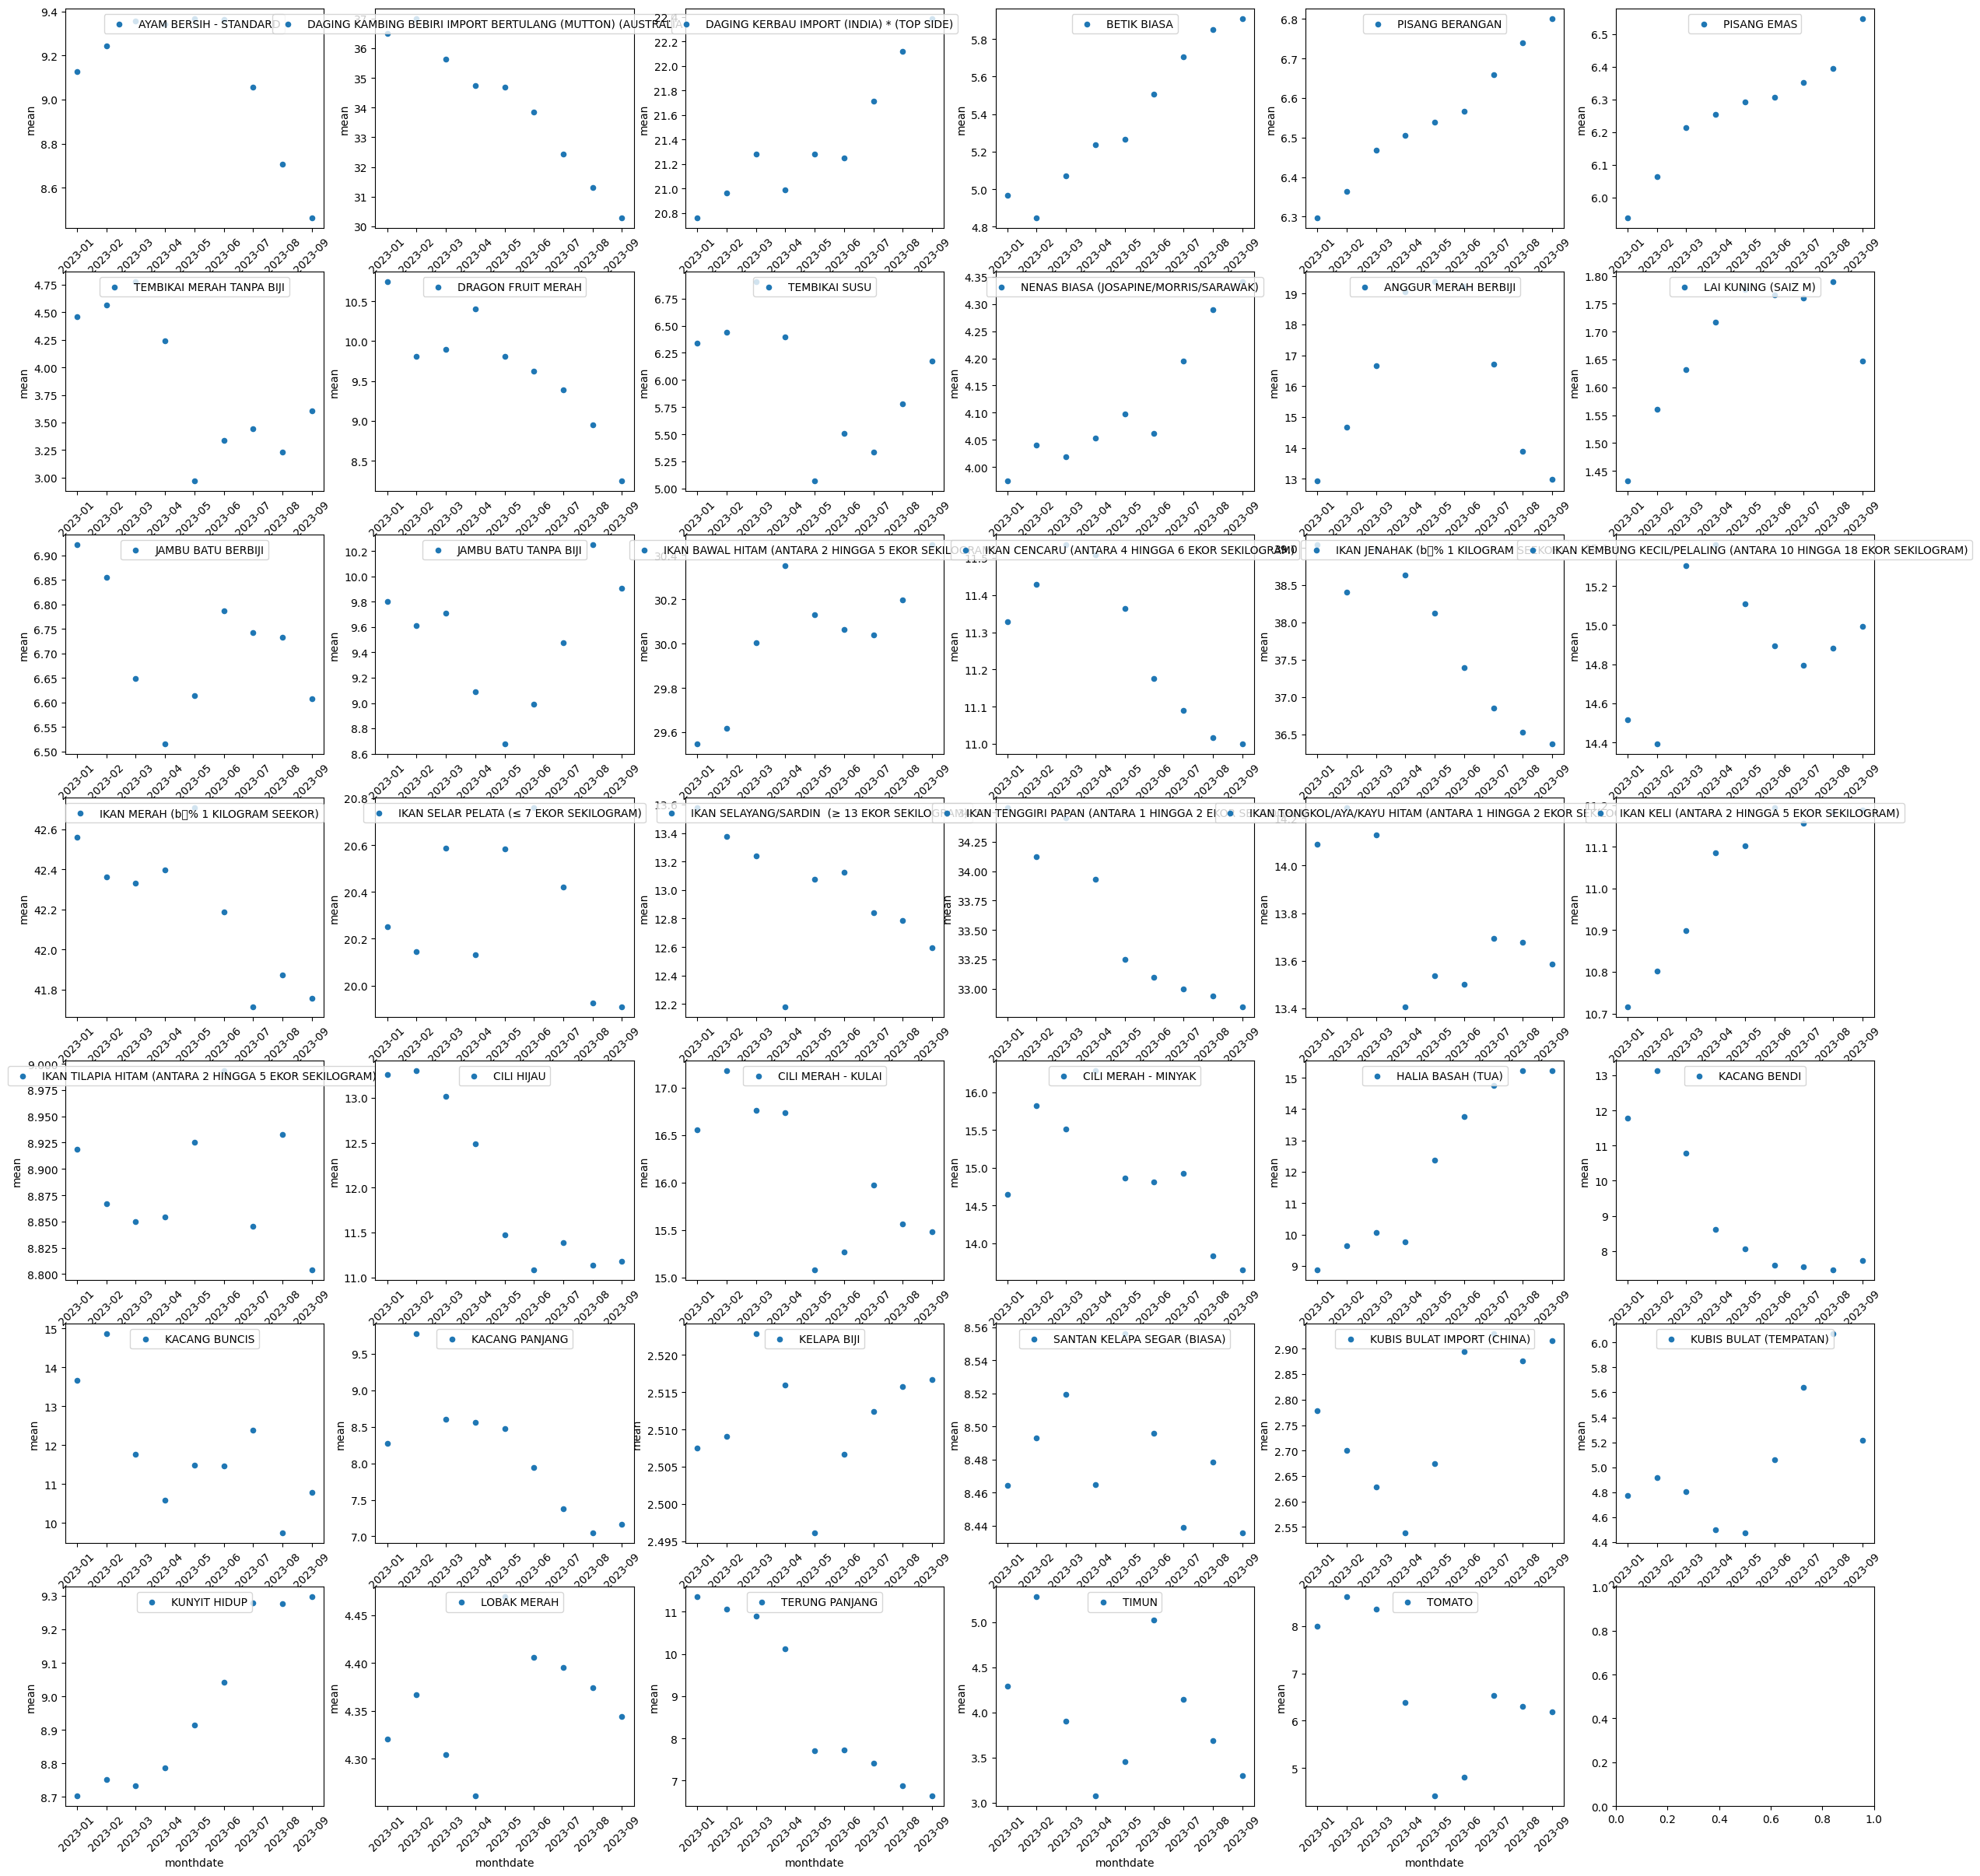

In [185]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
fig, axes = plt.subplots(nrows=7, ncols=6)

i=0
j=0

item_count=1
print(len(item_c_list))
for w,item_c in enumerate(item_c_list):

    #print(f'{w} {item_c}')

    #print(f'item_count:{item_count} i:{i} j:{j}')

    df_plot = df_price_change_ALLitems[df_price_change_ALLitems["item_code"]==item_c]

    item_name = df_plot["item"].unique()
    item_name = item_name[0]

    item_unit = df_plot["unit"].unique()
    item_unit = item_unit[0]

    #title_plot = item_name + ' ' + item_unit
    title_plot = item_name
    

    #df_plot.plot.scatter(x="monthdate",y="mean", title=title_plot, rot=90, ax=axes[i,j])
    ax = df_plot.plot.scatter(x="monthdate",y="mean", ax=axes[i,j], rot=45,figsize=(30,30),label=title_plot)
    ax.legend(loc='upper center')
    

    j+=1

    if (j==6):
        j=0
        i+=1
    
    if (w==40):
        break

# Previous Analysis on LinkedIn

![Alt text](image-5.png)

# Linear regression

## Regression on ONE item

R2_squared: 0.46196825899326566
c {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
coeff [[-0.08070673]]
intercept [9.51762511]


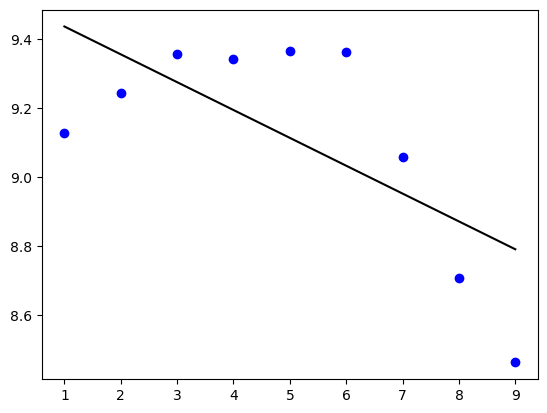

In [214]:
from sklearn import linear_model
data = df_price_change_ALLitems[df_price_change_ALLitems['item_code']==1]

x = np.arange(1,10) #for jan to september because current monthdate is in string

x_train = np.array(x.reshape(-1, 1))
y_train = np.array(data['mean']).reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(x_train,y_train)

r2_score = model.score(x_train,y_train)
print(f'R2_squared: {r2_score}')


print('coeff',model.coef_)
print('intercept',model.intercept_)


y_pred = model.predict(x_train)
plt.scatter(x_train, y_train, color ='b')
plt.plot(x_train, y_pred, color ='k')
 
plt.show()

## Regression for all items

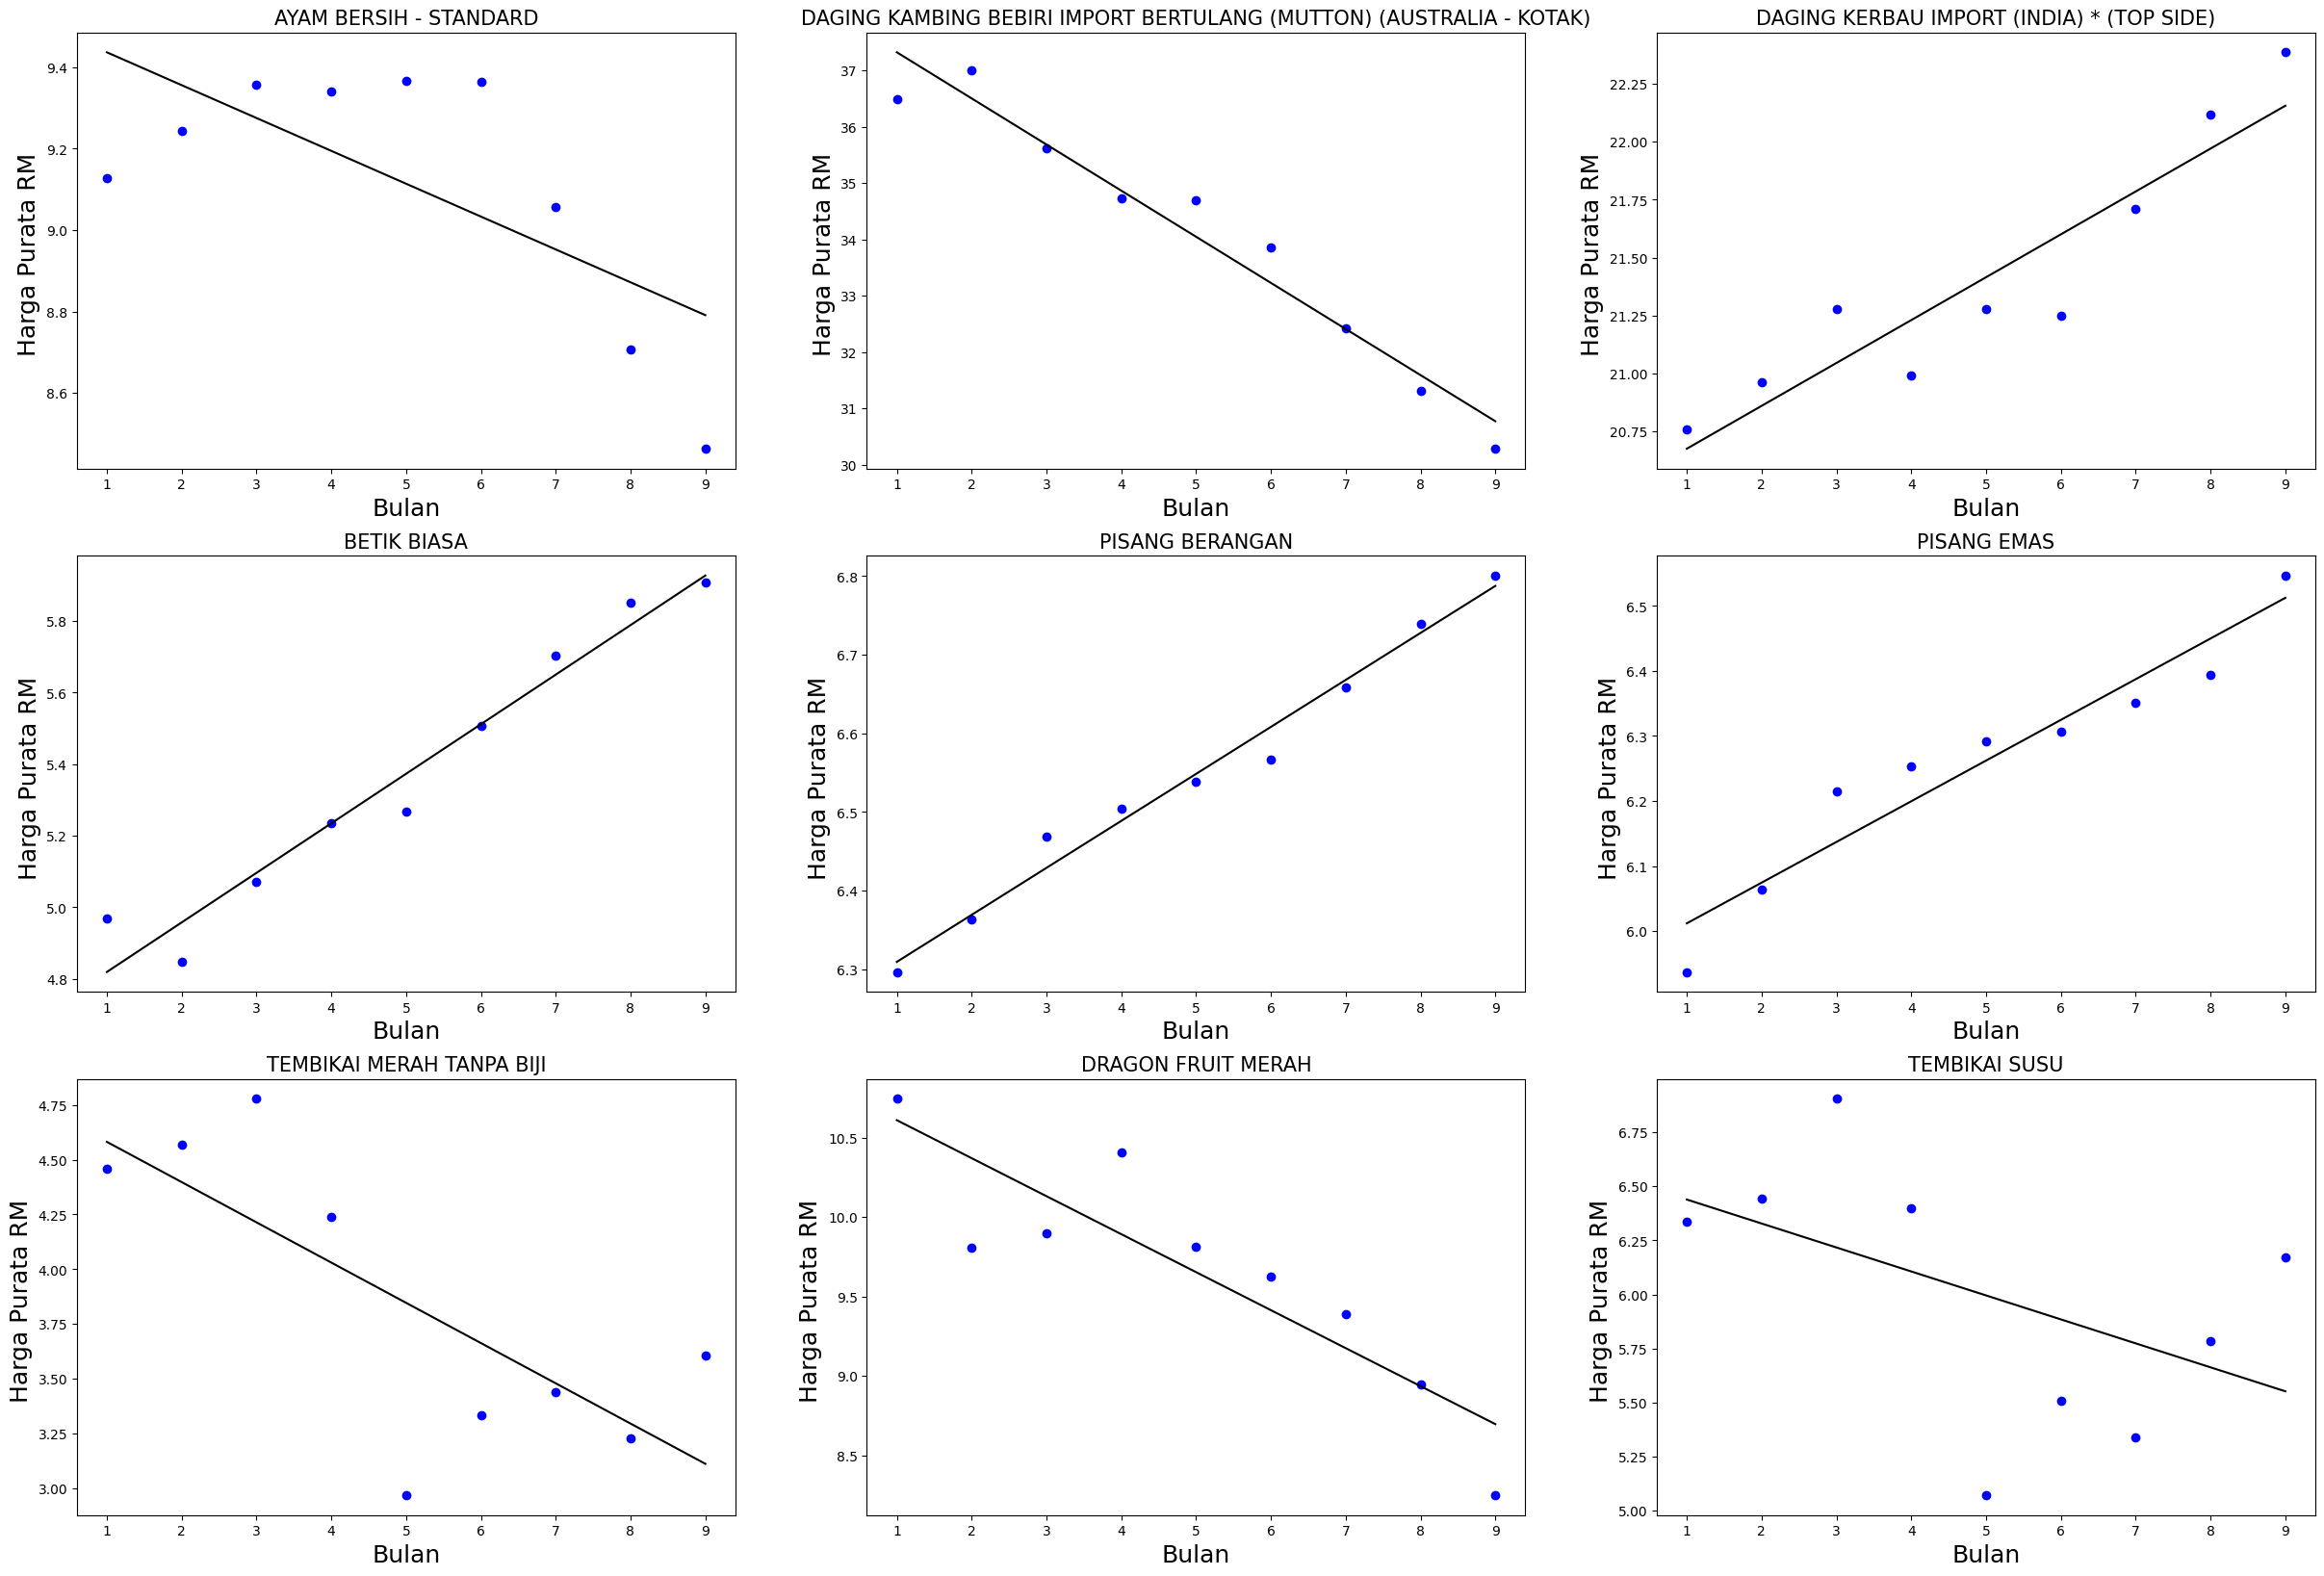

In [258]:
from sklearn import linear_model

import matplotlib
import matplotlib.pyplot as plt


x = np.arange(1,10) #for jan to september because current monthdate is in string
x_train = np.array(x.reshape(-1, 1))

row_lim = 3
col_lim = 3
fig, axes = plt.subplots(nrows=row_lim, ncols=col_lim,figsize=(30,20))


i=0
j=0
for w, item_c in enumerate(item_c_list):

    #print(f'i:{i} j:{j}')

    data = df_price_change_ALLitems[df_price_change_ALLitems['item_code']==item_c]
    item_name = data["item"].unique()
    item_name = item_name[0]

    item_unit = data["unit"].unique()
    item_unit = item_unit[0]

    #title_plot = item_name + ' ' + item_unit
    title_plot = item_name


    y_train = np.array(data['mean']).reshape(-1, 1)

    model = linear_model.LinearRegression()
    model.fit(x_train,y_train)

    y_pred = model.predict(x_train)
    

    axes[i,j].scatter(x_train, y_train, color ='b')
    axes[i,j].plot(x_train, y_pred, color ='k')
    axes[i,j].tick_params(axis='both', which='major', labelsize=10)
    axes[i,j].set_title(title_plot,fontsize=15)
    


    j+=1

    if (j==col_lim):
        j=0
        i+=1
    
    if (i==row_lim):
        break


for ax in axes.flat:
    #ax.set(xlabel='Months', ylabel='Mean price RM')
    ax.set_xlabel('Bulan',fontsize=18)
    ax.set_ylabel('Harga Purata RM ',fontsize=18)

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axes.flat:
#    ax.label_outer()
